# Guía 6.3: Introducción a la minería de datos textuales en R

Computación 2, IES.
Profesor: Eduardo Jorquera, eduardo.jorquera@postgrado.uv.cl

# Análisis de sentimiento con datos ordenados

Un texto puede proyectar emociones del emisor, mira cómo la minería de texto puede enfocarse al contenido emocional:

![image](tidyflow-ch-2.png)

La imagen describe el típico análisis de texto si usamos tidytext para nuestro análisis.


Este esquema es útil cuando trabajamos el texto como datos ordenados; una forma de hacerlo es considerar el texto como una combinación de palabras. Hay más formas de enfocar el análisis de sentimiento, pero es el más frecuente.

# El dataset `sentiments`

Hay varias formas de estudiar el análisis de sentimiento; pues hay varios métodos y diccionarios que evalúan la opinión o emoción en un texto. El paquete tidytext contiene varios sentimientos léxicos. Tres léxicos de uso general son:
* `AFINN` de [Finn Årup Nielsen](https://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010).
* `bing` de [Bing Liu and collaborators](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), y
* `nrc` de [Saif Mohammad and Peter Turney](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm).

Estos tres léxicos están basados en unigramas; es decir, palabras. Estos léxicos, contienen muchas palabras en inglés, y éstas se asignan a puntajes para un análisis positivo o negativo, y también para emociones como alegría, enojo, tristeza, etc. El léxico `nrc` categoriza las palabras en un formato binario ("sí"/"no") en categorías de positivo, negativo, enojo, expectacion, asco, miedo, alegría, tristeza, sorpresa y confianza. El léxico `bign` categoriza palabras en un formato binario entre categorías positivas o negativas. El léxico `AFINN` asigna palabras con un puntaje que va de -5 a 5; los puntajes negativos indican un sentimiento negativo y puntajes positivos, sentimientos positivos. Toda esta información está tabulada en el dataset `sentiments`, y el paquete tidytext provee de la función `get_sentiments()` para especificar léxicos sin las columnas que no son usadas en ese léxico.

In [6]:
library(tidytext)

get_sentiments("afinn")

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
abhorrent,-3


In [7]:
get_sentiments("bing")

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [8]:
get_sentiments("nrc")

word,sentiment
<chr>,<chr>
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,negative
abandoned,sadness
abandonment,anger


# Actividad

¿Cómo funcionan los métodos basados en diccionarios para analizar sentimientos?

# Análisis de sentimiento y la unión interna

Con el formato de datos ordenados (tidy data), el análisis de sentimiento puede ser hecho con la unión interna (inner join). Ésto se trata de otra victoria para el formato de datos ordenados; ya que todo se puede hacer con lo que has aprendido previamente. Quitar las palabras vacías es una operación `antijoin`, y hacer el análisis de sentimiento también lo es.

Veamos las palabras con un puntaje de alegría del léxico NRC. ¿Cuáles son las palabras más comunes en *Emma*? Primero, debemos tomar el texto de las novelas y convertir el texto en formato de datos ordenados, usando `unnest_tokens()`, justo como lo vimos antes; también creemos otras columnas para guardar la línea de donde provienen y el capítulo del libro de donde cada término está guardado; usamo `group_by` y `mutate` para contruir tales columnas:

In [9]:
?regex

In [10]:
#head(austen_books())
#class(austen_books() %>% group_by(book))
austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", 
                                                 ignore_case = TRUE))))

text,book,linenumber,chapter
<chr>,<fct>,<int>,<int>
SENSE AND SENSIBILITY,Sense & Sensibility,1,0
,Sense & Sensibility,2,0
by Jane Austen,Sense & Sensibility,3,0
,Sense & Sensibility,4,0
(1811),Sense & Sensibility,5,0
,Sense & Sensibility,6,0
,Sense & Sensibility,7,0
,Sense & Sensibility,8,0
,Sense & Sensibility,9,0


In [11]:
library(janeaustenr)
library(dplyr)
library(stringr)

tidy_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", 
                                                 ignore_case = TRUE)))) %>%
  ungroup() %>%
  unnest_tokens(word, text)

Nota que como output (resultado) usamos *word*, esto es útil y conveniente porque varios léxicos para análisis de sentimiento usan esto para hacer los *inner joins* y *anti-joins* (uniones y restas de palabras).

Ahora que el texto está en un formato ordenado (una palabra por fila), estamos listos para el análisis de sentimiento. Primero usemos el léxico NRC y filtremos (`filter()`) para las palabras de alegría. Luego, filtraremos (`filter()`) el dataframe con el texto de los libros para las palabras de *Emma*, y luego usaremos `inner_join()` para aplicar el análisis de sentimiento. ¿Cuáles son las palabras más comunes en *Emma*? Usemos `count()` de dplyr:

In [12]:
#head(get_sentiments("nrc"))
head(nrc_joy)
tidy_books %>%
  filter(book == "Emma") %>%
  inner_join(nrc_joy)

ERROR: Error in head(nrc_joy): object 'nrc_joy' not found


In [ ]:
nrc_joy <- get_sentiments("nrc") %>% 
  filter(sentiment == "joy")

tidy_books %>%
  filter(book == "Emma") %>%
  inner_join(nrc_joy) %>%
  count(word, sort = TRUE) %>%
  head(10)

Vemos mayormente palabras felices sobre esperanza, amistad y amor. También podemos ver palabras que no son usadas para mostrar alegría, usadas por Austen (“found”, “present”).

Secciones pequeñas del texto puede que no tengan la suficiente cantidad de palabras como para tener una buena estimación del sentimiento. Para estos libros, si usamos 80 lineas está bien, pero puede variar dependiendo de la obra, ver en qué línea se puede empezar a contar. Entonces usaremos `spread()` para tener sentimientos positivos y negativos en columnas separadas, para finalmente calcular un sentimiento neto (positivo - negativo).

## Pregunta: 
Qué hace el operador `%/%`?



In [ ]:
library(tidyr)

jane_austen_sentiment <- tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(book, index = linenumber %/% 80, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Ahora podemos graficar estos puntajes de sentimiento a lo largo de la trayectoria para cada novela. Nota que estamos graficando según la indexación como eje horizontal, lo que mantiene el orden narrativo de la obra.

In [ ]:
library(ggplot2)

ggplot(jane_austen_sentiment, aes(index, sentiment, fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = "free_x")

# Comparando tres diccionarios de análisis de sentimiento

Con varias opciones para léxicos sentimentales, quizás quieras saber cuál es más apropiado de usar según los propósitos requeridos. Usemos los tres léxicos sentimentales y examinemos cómo el sentimiento cambia a través del arco narrativo "Orgullo y Prejuicio". Primero filtremos para elejir  sólo las palabras de la novela en la que estamos interesados:

In [13]:
pride_prejudice <- tidy_books %>% 
  filter(book == "Pride & Prejudice")

head(pride_prejudice)

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Pride & Prejudice,1,0,pride
Pride & Prejudice,1,0,and
Pride & Prejudice,1,0,prejudice
Pride & Prejudice,3,0,by
Pride & Prejudice,3,0,jane
Pride & Prejudice,3,0,austen


Ahora podemos usar `inner_join()` para estimar el sentimiento según los diferentes léxicos que hemos visto.

Recuerda que el léxico AFINN mide el sentimiento entre -5 y 5, mientras que  los otros dos léxicos categorizan los términos de una forma binaria.

Usemos nuevamente el operador `%/%` para definir las secciones de texto más grandes que abarcan múltiples líneas, y podemos usar el mismo patrón con `count()`, `spread()`, y `mutate()` para encontrar el sentimiento en cada una de estas secciones de texto.

In [16]:
library(tidyr)
afinn <- pride_prejudice %>% 
  inner_join(get_sentiments("afinn")) %>% 
  group_by(index = linenumber %/% 80) %>% 
  summarise(sentiment = sum(value)) %>% 
  mutate(method = "AFINN")

bing_and_nrc <- bind_rows(pride_prejudice %>% 
                            inner_join(get_sentiments("bing")) %>%
                            mutate(method = "Bing et al."),
                          pride_prejudice %>% 
                            inner_join(get_sentiments("nrc") %>% 
                                         filter(sentiment %in% c("positive", 
                                                                 "negative"))) %>%
                            mutate(method = "NRC")) %>%
  count(method, index = linenumber %/% 80, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


Ahora tenemos una estimación para el sentimiento neto (positivo - negativo) en cada trozo de texto de la novela por cada léxico de sentimiento. Liguemoslo y visualicemoslo en la siguiente figura:

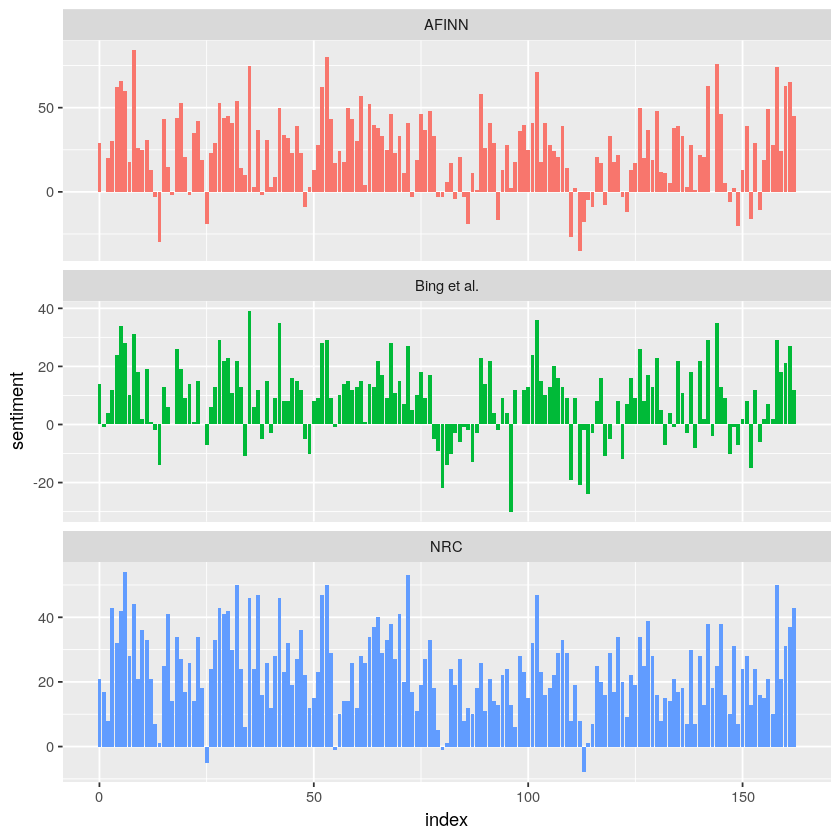

In [18]:
library(ggplot2)
bind_rows(afinn, 
          bing_and_nrc) %>%
  ggplot(aes(index, sentiment, fill = method)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~method, ncol = 1, scales = "free_y")

Los tres diferentes léxicos para calcular sentimientos dan resultados que son absolutamente diferentes, pero tienen trayectorias relativamente similares. Vemos que  los piks son similares en sentimiento y se encuentran en el mismo lugar de la indexación, pero los valores son bastante diferentes. Le léxico AFINN da el mayor valor absoluto con valores positivos altos. El léxico de Bing *et.al.* tiene valores absolutos menores y se ve que etiqueta a bloques más grandes del texto contiguo en positivo o en negativo. Los resultados de NRC se ve que están trasladados positivamente que los otros dos, etiquetando el texto más positivamente, pero detecta cambios relativamente similares en el texto. Encontramos diferencias similares entre los métodos cuando vemos a otras novelas; el sentimiento con el léxico NRC es mayor, el AFINN tiene mayor varianza, el de Bing *et.al.* parece hallar tramos más largos de texto similar, pero los tres coinciden aproximadamente en las tendencias generales del sentimiento a través de un arco narrativo.

¿Por qué es, por ejemplo, el resultado del léxico NRC más alto en sentimiento comparado con el resultado de Bing *et.al.*? Veamos brevemente cuántas palabras positivas y negativas hay en el léxico.

In [19]:
get_sentiments("nrc") %>% 
     filter(sentiment %in% c("positive", 
                             "negative")) %>% 
  count(sentiment)

get_sentiments("bing") %>% 
  count(sentiment)

sentiment,n
<chr>,<int>
negative,3324
positive,2312


sentiment,n
<chr>,<int>
negative,4781
positive,2005


Ambos léxicos tienen más palabras negativas que positivas, pero la razón de palabras negativas que positivas es mayor en el léxico Bing que en el de NRC. Esto contribuye al efecto que vemos en el gráfico más arriba, como cualquier diferencia sistemática en emparejamiento de palabras.

# Palabras positivas y negativas más comunes

Una ventaja de tener el dataframe con las palabras y el sentimiento es que podemos analizar el conteo de las palabras que contribuyen a cada sentimiento. Implementando `count()`, podemos encontrar cómo cada palabra contribuye a cada sentimiento.

In [21]:
bing_word_counts <- tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

head(bing_word_counts)

Joining, by = "word"


word,sentiment,n
<chr>,<chr>,<int>
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639


Esto puede ser visualizado, y podemos "entubarlo" usando ggplot2, si queremos, porque estamos usando datos ordenados

Selecting by n


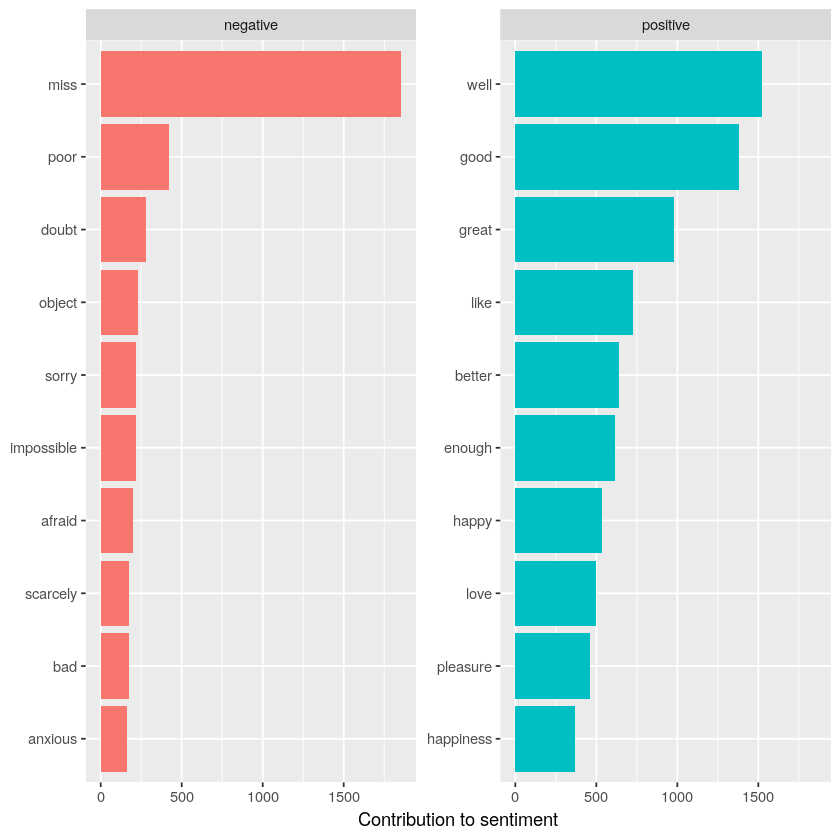

In [23]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

Esta figura nos permite detectar anomalías en el análisis de sentimiento; la palabra "miss" es etiquetada como negativa pero es usada para referirse a una mujer no casada en el trabajo de Jane Austen. Si fuese apropiado para nuestros propósitos, podríamos fácilmente agregar "miss" a un listado de palabras vacías usando `bind_rows()`. Podemos implementarlo con una estrategia tal como esta:

In [25]:
custom_stop_words <- bind_rows(tibble(word = c("miss"), 
                                          lexicon = c("custom")), 
                               stop_words)

head(custom_stop_words)

word,lexicon
<chr>,<chr>
miss,custom
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART


# Nubes de palabras

Hemos visto lo ventajoso que es trabajar el texto como datos ordenados, ahora veremos como hacer nubes de palabras. Por ejemplo considera el paquete wordcloud de R, veamos cómo funciona con el trabajo de Jane Austen de nuevo, pero esta vez con una nube de palabras:

Loading required package: RColorBrewer
Joining, by = "word"


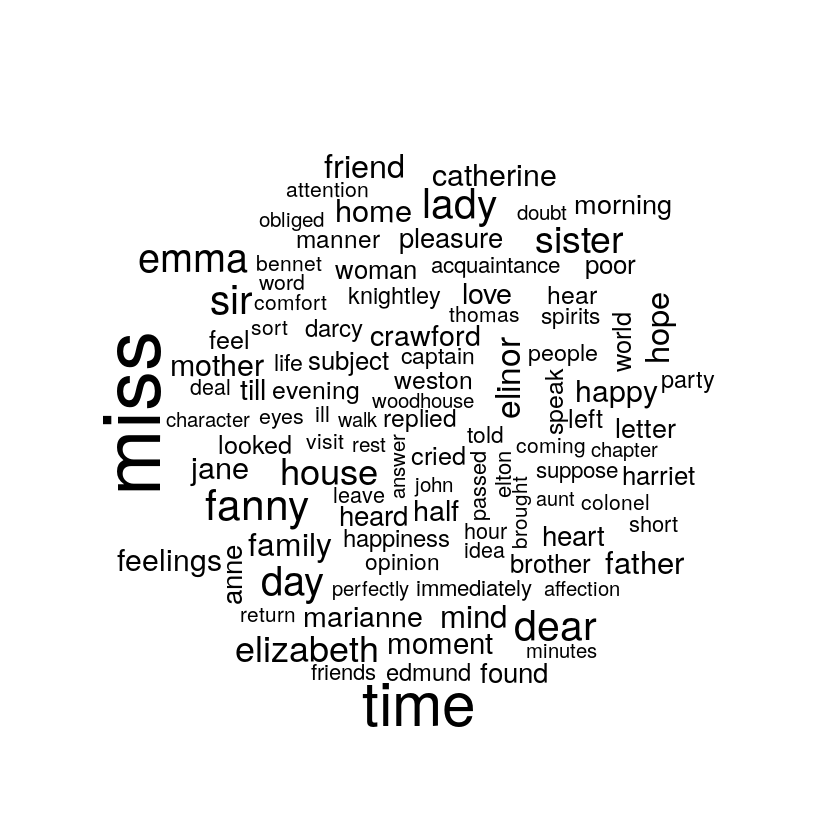

In [26]:
library(wordcloud)

tidy_books %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

En otras funciones, tales como `comparison.cloud()`, quizás necesitas cambiar la forma del dataframe a una matriz con la función `acast()` de reshape2. Hagamos análisis de sentimiento para etiquetar términos positivos y negativos usando una unión interna (*inner join*), luego encontremos los términos positivos y negativos más comunes. Hasta el paso en que necesitemos enviar los datos a `comparison.cloud()`, todo esto puede ser hecho con *joins*, entubando (`%>%`), y usando dplyr porque nuestros datos están ordenados.


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Joining, by = "word"


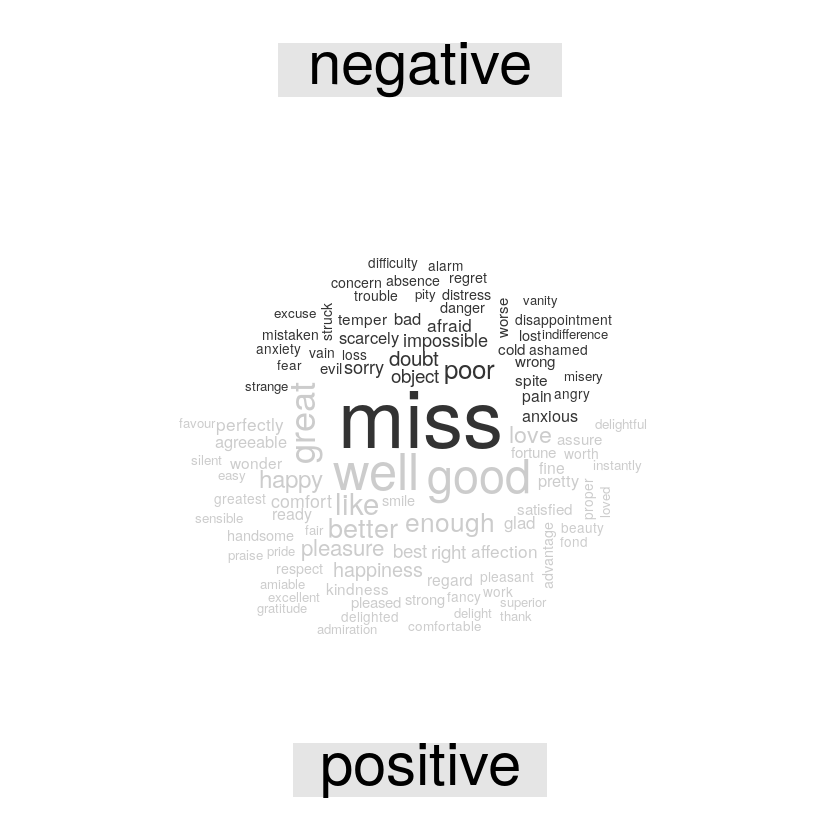

In [27]:
library(reshape2)

tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("gray20", "gray80"),
                   max.words = 100)

# Viendo unidades más allá que palabras

Mucho trabajo útil se puede hacer tokenizando a nivel de palabra, pero a veces es necesario y más útil utilizar otras unidades de texto. Por ejemplo, algunos algoritmos de análisis de sentimiento sólo ven unigramas (palabras solas) para intentar entender el sentimiento de una oración como un entero. Estos algoritmos intentan entender que

``` No estoy teniendo un buen día ```

Es una sentencia un tanto triste, no una alegre, por la negación. Paquetes en R incluyendo coreNLP, celanNLP y sentimentr son ejemplos de tales algoritmos de análisis de sentimiento. Para esto, podemos tokenizar texto en sentencias y hace sentido usar un nuevo nombre para la columna de output en tal caso.

In [33]:
PandP_sentences <- tibble(text = prideprejudice) %>% 
  unnest_tokens(sentence, text, token = "sentences")

PandP_sentences$sentence[2]

[1] "however little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters."

La sentencia tokenizadora parece tener problemas con texto codificado como UTF-8, especialmente con secciones de diálogo; lo hace mucho mejor con las puntuaciones en ASCII. Una posibilidad, si esto es importante, intenta usar `iconv()`, con algo como `iconv(text, to = ĺatin1)` en el uso de la función `mutate()`.

Otra opción, en `unnest_tokens()` es separar en tokens usando algún patrón de regex. Podríamos utilizar esto, por ejemplo, para separar el texto de las novelas de Jane Austen en un dataframe por capítulo.

In [34]:
austen_chapters <- austen_books() %>%
  group_by(book) %>%
  unnest_tokens(chapter, text, token = "regex", 
                pattern = "Chapter|CHAPTER [\\dIVXLC]") %>%
  ungroup()

austen_chapters %>% 
  group_by(book) %>% 
  summarise(chapters = n())

book,chapters
<fct>,<int>
Sense & Sensibility,51
Pride & Prejudice,62
Mansfield Park,49
Emma,56
Northanger Abbey,32
Persuasion,25


Hemos recuperado el número correcto de capítulos en cada novela (más una fila "extra" para cada título de novela). En el dataframe `austen_chapters`, cada fila corresponde a un capítulo.

Cerca del principio de esta guía, usamos una expresión regular similar para hallar todos los capítulos de las novelas de Austen paradata frames de datos textuales ordenados, organizados como *una palabra por fila*. Podemos usar el análisis de texto ordenado (tidy text) para hacer preguntas tales como cuáles son los capítulos más negativos en cada novela de Jane Austen, por ejemplo. Primero, obtengamos la lista de palabras netgativas del léxico Bing. Segundo, hacemos un dataframe que muestre cuántas palabras hay en cada capítulo, y así podamos normalizar el largo de los capítulos. Luego, hallamos el número de palabras negativas en cada capítulo y dividimos por el total de palabras en cada capítulo. Para cada libro, ¿cuál capítulo tiene la mayor proporción de palabras negativas?

In [35]:
bingnegative <- get_sentiments("bing") %>% 
  filter(sentiment == "negative")

wordcounts <- tidy_books %>%
  group_by(book, chapter) %>%
  summarize(words = n())

tidy_books %>%
  semi_join(bingnegative) %>%
  group_by(book, chapter) %>%
  summarize(negativewords = n()) %>%
  left_join(wordcounts, by = c("book", "chapter")) %>%
  mutate(ratio = negativewords/words) %>%
  filter(chapter != 0) %>%
  top_n(1) %>%
  ungroup()

Joining, by = "word"
Selecting by ratio


book,chapter,negativewords,words,ratio
<fct>,<int>,<int>,<int>,<dbl>
Sense & Sensibility,43,161,3405,0.04728341
Pride & Prejudice,34,111,2104,0.05275665
Mansfield Park,46,173,3685,0.04694708
Emma,15,151,3340,0.04520958
Northanger Abbey,21,149,2982,0.04996647
Persuasion,4,62,1807,0.03431101
